In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
song_df=pd.read_csv(r"C:\Users\Satyajit Samal\OneDrive\Desktop\DSMP\Ml_projects\Recomendation_system\data\raw\song_data.csv")
user_data_path=r"C:\Users\Satyajit Samal\OneDrive\Desktop\DSMP\Ml_projects\Recomendation_system\data\raw\user_data.csv"

In [ ]:
song_df

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50678,50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
50679,50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4
50680,50680,TRZRODK128F92D68D7,The Revelation,coldrain,https://p.scdn.co/mp3-preview/4b51a813f67e3853...,1gXMORZRGA40PE9rDE9cja,"metal, metalcore, post_hardcore",NaN,2014,254826,...,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,4
50681,50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/5a61e031df174666...,1dxMDGvIYHFYgRvmw1uMHG,NaN,NaN,2008,243293,...,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,4


In [7]:
!pip install dask[dataframe]

  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached pyarrow-20.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.3 MB/s eta 0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached pyarrow-20.0.0-cp312-cp312-win_amd64.whl (25.7 MB)

   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pyarrow]
   ------ --------------------------------- 1/6 [pya

In [5]:
import dask.dataframe as dd

In [13]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [6]:
user_df=dd.read_csv(user_data_path)

In [11]:
user_df.compute()


,Unnamed: 0,track_id,user_id,playcount
0,0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...,...
969568,9711296,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
969569,9711297,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
969570,9711298,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
969571,9711299,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [7]:
user_df.npartitions

10

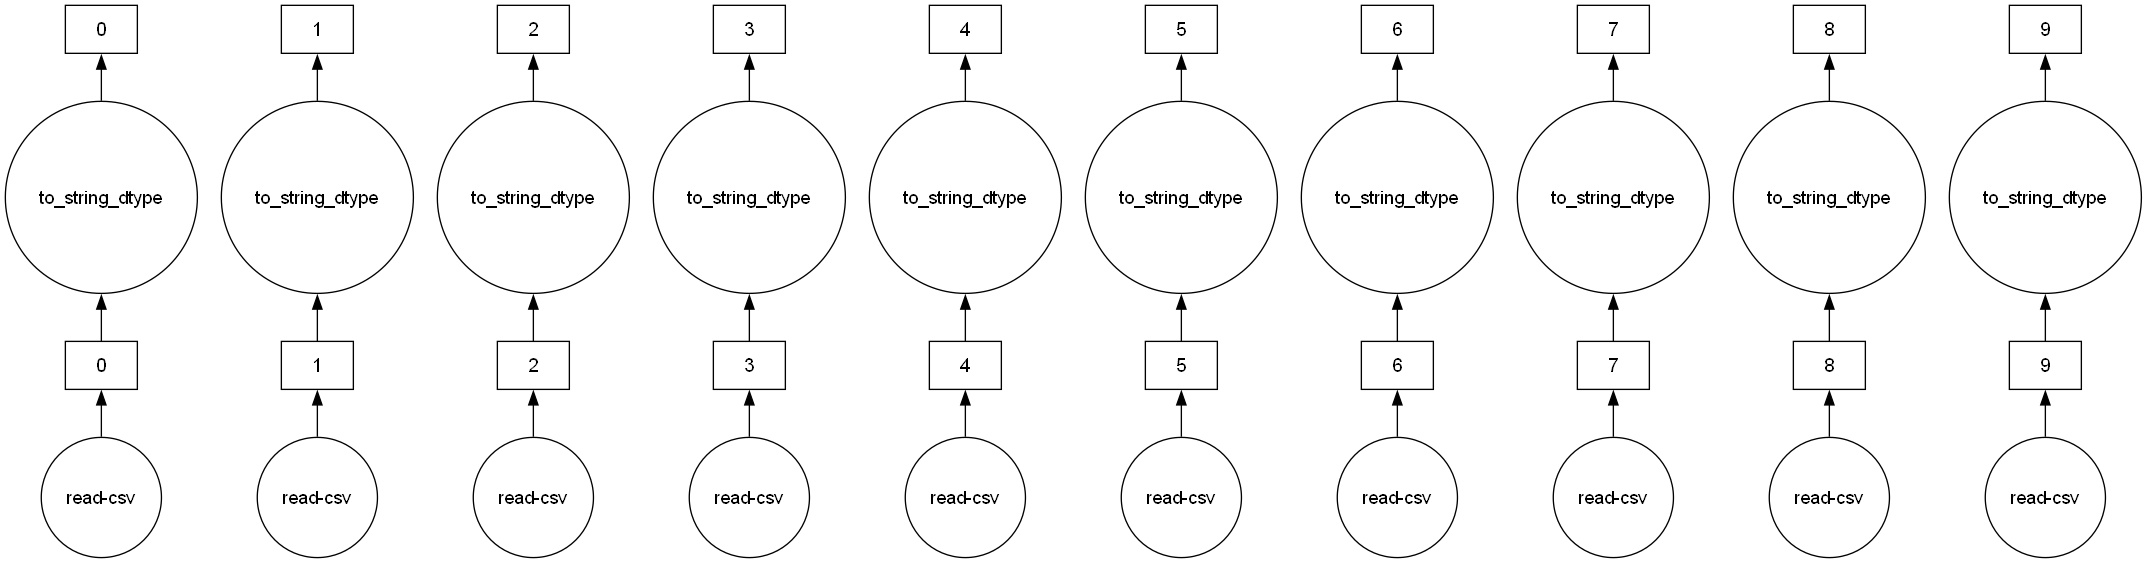

In [8]:
user_df.visualize(tasks=True)

In [12]:
user_df.columns

Index(['Unnamed: 0', 'track_id', 'user_id', 'playcount'], dtype='object')

In [15]:
user_df=user_df.drop(columns=['Unnamed: 0'])

In [16]:
user_df.compute()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...
969568,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
969569,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
969570,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
969571,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [24]:
# Number of unique tasks in the data
unique_track=user_df["track_id"].nunique()
unique_tracks=unique_track.compute()


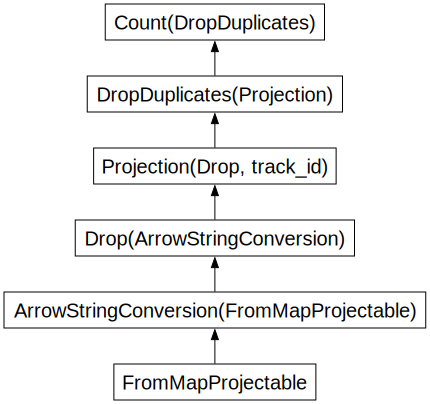

In [26]:
unique_track.visualize()

In [27]:
unique_users = user_df.loc[:,"user_id"].nunique()

unique_users = unique_users.compute()

unique_users
     

962037

## list of Unique tracks

In [28]:
unique_track_ids=user_df["track_id"].unique().compute()

In [30]:
unique_track_ids=unique_track_ids.tolist()

In [31]:
unique_track_ids

['TRFUPBA128F934F7E1',
 'TRPUGUW128F426BF6F',
 'TRADVZX128F426BF79',
 'TRDOYFZ128F426E715',
 'TRKPWGR128E078EE06',
 'TRZCIWG128F4248B25',
 'TRXGIBZ128F427CE2B',
 'TRFCJQM128F428D30A',
 'TRPRGAC128F428D310',
 'TRBLJBU128F934147B',
 'TRATTGW128F427A82D',
 'TRMVAFP128F14563A9',
 'TRLATHU128F92FC275',
 'TRXPJQB128EF33FB4D',
 'TRYVEAL128F92F8A00',
 'TRWFJOB128F4298317',
 'TRUSJGD128F427562C',
 'TRDFBPD12903CA9CF3',
 'TRXPSPE128EF33FB50',
 'TRLWRXI128F92D8944',
 'TRSLSAA128F930C4E6',
 'TRXTGOV128E0780C92',
 'TRWKMSV128F92F0240',
 'TRPFJPH128F427A71D',
 'TREMWWD128F92FFBDC',
 'TRJRBWA128F9317175',
 'TRRYLYK128F92F89F6',
 'TRSVTRT12903CB450E',
 'TRDYRIK128F9317174',
 'TRWMXEH128F9317169',
 'TRNEJRG128F425FD88',
 'TRWAEUG12903CEB0A0',
 'TRJCIZO128F424FEF9',
 'TRLQUGG128F4261B0E',
 'TREXCHD128EF33FB4E',
 'TRAOIAH128F92F707B',
 'TRQKOYC128F92E4945',
 'TRGMCQT128F92FED48',
 'TRTJYDU128F92E49EE',
 'TRPHFNB128F93141E7',
 'TRYJGKN128F92E23CA',
 'TRCRSAS12903CC6811',
 'TRRJUPO128F930327A',
 'TRZIVHZ12

## filter songs from song data

In [32]:
filter_songs=song_df[song_df["track_id"].isin(unique_track_ids)]

In [34]:
filter_songs.reset_index(drop=True,inplace=True)

In [35]:
filter_songs

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
3,7,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...,01puceOqImrzSfKDAcd1Ia,"rock, alternative, indie, alternative_rock, in...",NaN,1996,264066,...,7,-9.129,1,0.0260,0.062600,0.000092,0.1720,0.317,74.807,4
4,9,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...,0BCPKOYdS2jbQ8iyB56Zns,"rock, alternative, indie, pop, alternative_roc...",NaN,2002,307879,...,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30454,50675,TRXWSIN128F9339A11,Infinite Love Song,Maximilian Hecker,https://p.scdn.co/mp3-preview/8b3d529025fe3c60...,2eIVm8hPf59hUS2PrdoGBa,"electronic, indie_pop, love",NaN,2002,285800,...,10,-7.431,1,0.0332,0.129000,0.437000,0.1220,0.551,99.679,4
30455,50677,TRPIGDW12903CDEB2D,Slip of the Lip,Fact,https://p.scdn.co/mp3-preview/cf64490291f9a600...,0PG7cpyNzRehf1YNIbAsol,"alternative_rock, punk_rock",Rock,2010,183640,...,2,-4.068,1,0.1840,0.000986,0.000002,0.3790,0.224,100.080,4
30456,50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
30457,50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4


In [36]:


filter_songs[filter_songs["name"] == "Crazy in Love"]

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3337,6013,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...,0klMKiGV38IRaBo3jjt3oC,"pop, female_vocalists, dance, soul, hip_hop, rnb",NaN,2003,249000,...,7,-5.829,1,0.218,0.00068,0.000003,0.049,0.642,99.211,4


In [41]:
import dask.dataframe as dd
import numpy as np
from scipy.sparse import csr_matrix


user_df["playcount"]=user_df["playcount"].astype(np.float64)


In [42]:
user_df=user_df.categorize(columns=["user_id","track_id"])

## Convert the user ids and track ids into numeric indices

In [45]:
user_mapping=user_df["user_id"].cat.codes
track_mapping=user_df["track_id"].cat.codes

In [46]:
user_df["user_idx"]=user_mapping
user_df["track_idx"]=track_mapping

In [47]:
user_df.compute()

,track_id,user_id,playcount,user_idx,track_idx
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,10705
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,7334
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,14212
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,23206
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,8936
...,...,...,...,...,...
969568,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,1932
969569,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,28694
969570,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,16702
969571,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,16795


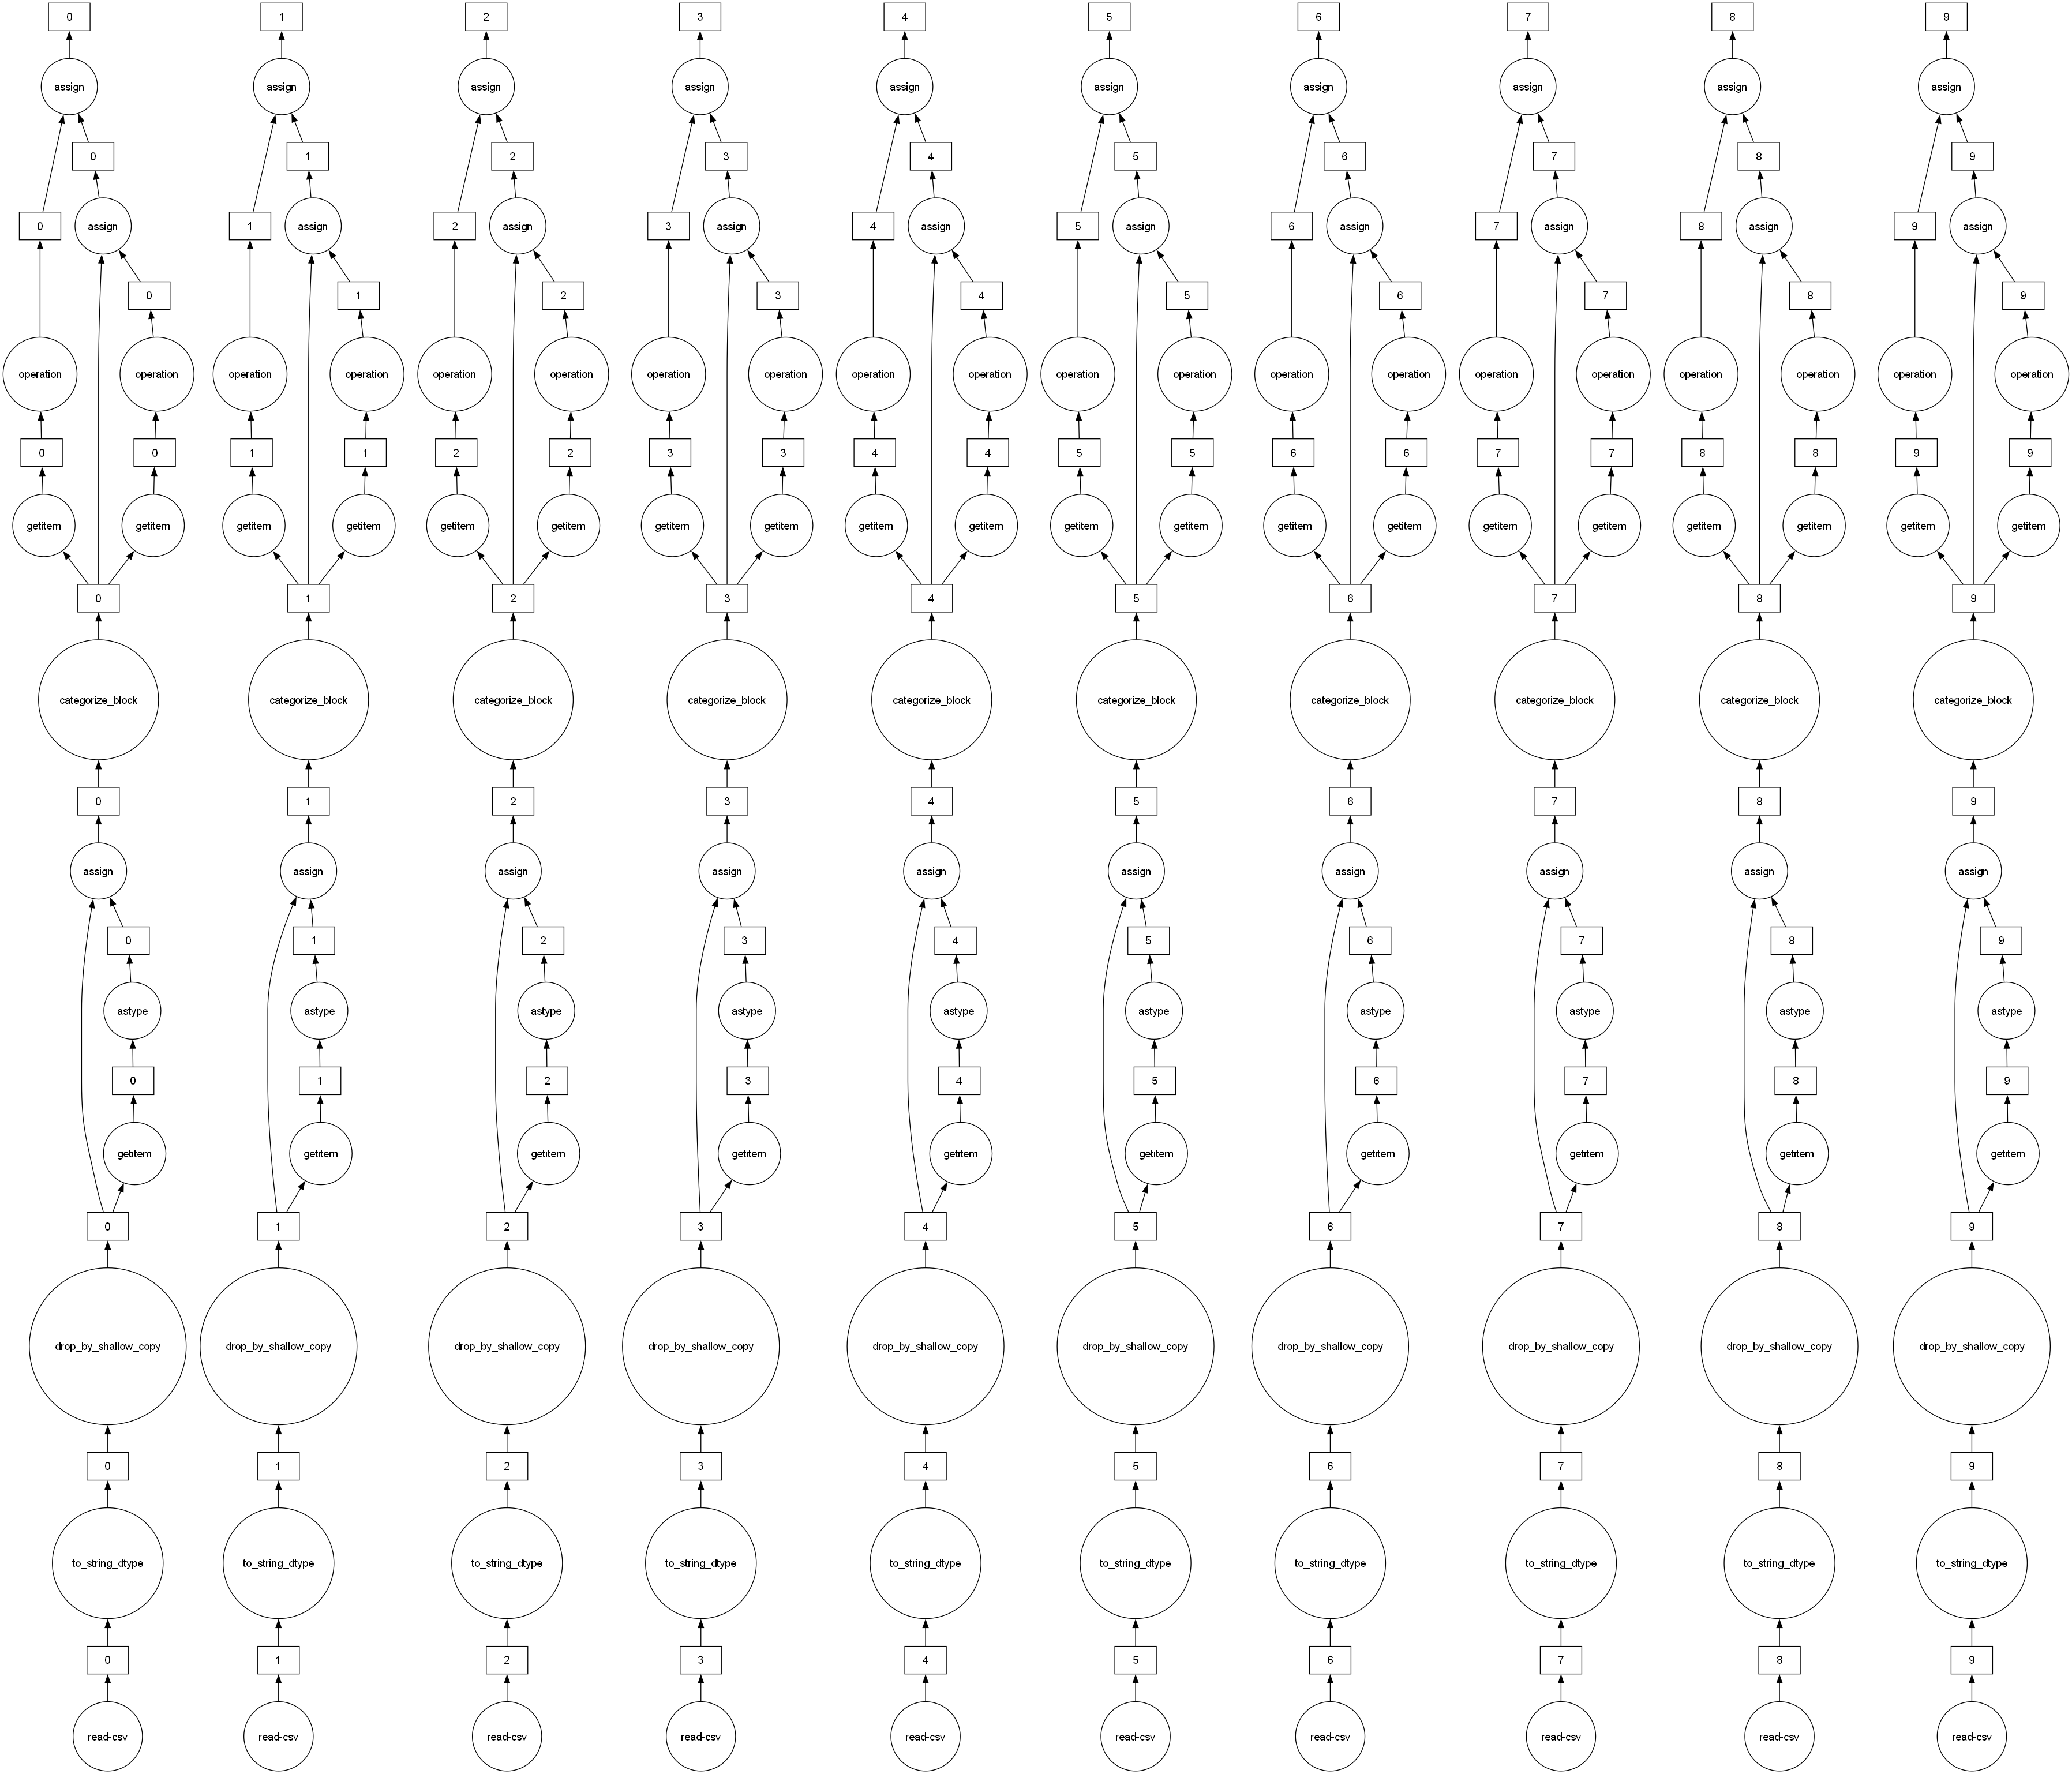

In [48]:
user_df.visualize(tasks=True)

# Dask does not support Pivot table directly, so we aggregate it manually

In [84]:
interaction_matrix=user_df.groupby(["track_idx","user_idx"])["playcount"].sum().reset_index()


In [86]:
interaction_matrix=interaction_matrix.compute()

In [87]:
col_indices=interaction_matrix["user_idx"]
row_indices=interaction_matrix["track_idx"]
values=interaction_matrix["playcount"]

# Building the sparce matrix

In [92]:
len(unique_track_ids)

30459

In [99]:
n_tracks=len(unique_track_ids)

In [108]:
unique_user_ids=user_df.compute()["user_id"].unique().tolist()

In [109]:
n_users=len(unique_user_ids)

In [110]:
sparse_matrix=csr_matrix((values,(row_indices,col_indices)),shape=(n_tracks,n_users))

In [112]:
print("shape of the matrix",sparse_matrix.shape)
print("Non-zero elements:", sparse_matrix.nnz)

shape of the matrix (30459, 962037)
Non-zero elements: 9711301


In [113]:
(sparse_matrix.nnz / (sparse_matrix.shape[0] * sparse_matrix.shape[1]))*100

0.033141335019756815

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

In [117]:
user_df.compute()

,track_id,user_id,playcount,user_idx,track_idx
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,10705
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,7334
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,14212
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,23206
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,8936
...,...,...,...,...,...
969568,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,1932
969569,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,28694
969570,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,16702
969571,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,16795


In [121]:
user_df["track_id"]

Dask Series Structure:
npartitions=10
    category[known]
                ...
         ...       
                ...
                ...
Dask Name: getitem, 14 expressions
Expr=(Assign(frame=Assign(frame=Categorize(frame=Assign(frame=Drop(frame=ArrowStringConversion(frame=FromMapProjectable(3ed90c1)), columns=['Unnamed: 0'])), categories={'user_id': 474307    00000b722001882066dff9d2da8a775658053ea0
923347    00001638d6189236866af9bbf309ae6c2347ffdc
726604    0000175652312d12576d9e6b84f600caa24c4715
846362    00001cf0dce3fb22b0df0f3a1d9cd21e38385372
734624    0000267bde1b3a70ea75cf2b2d216cb828e3202b
                            ...                   
271857    ffffdc6c89988cd6119067769162948eacf8b670
735124    ffffe07df4bb5fd929efe42c5728f3a0c1621277
195864    fffff3e690fcda840b716ce7249d8935ff3323fc
665774    fffff67d54a40927c93d03bd6c816b034b59f087
446499    fffff9534445f481b6ab91c345500083d2ce4df1
Name: user_id, Length: 962037, dtype: string, 'track_id': 25631     TRAAAED128E0783FAB

In [123]:
np.where(user_df["track_id"].cat.categories == "TROINZB128F932F740")

(array([17018], dtype=int64),)

In [145]:
input_array=sparse_matrix[17018]

In [146]:
similarity_score=cosine_similarity(input_array,sparse_matrix)

In [154]:
np.sort(similarity_score.ravel())[::-1][:5]

array([1.        , 0.08225488, 0.07217127, 0.05592032, 0.05529279])

In [155]:
similarity_score

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.20943546e-05]])

In [156]:
np.argsort(similarity_score.ravel())[-6:][::-1]

array([17018, 24529, 28964,  3620,  9470,  7882], dtype=int64)

In [160]:
recomendations=user_df["track_id"].cat.categories[np.argsort(similarity_score.ravel())[-6:][::-1]]

In [162]:
filter_songs[filter_songs["track_id"].isin(recomendations)]

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3337,6013,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...,0klMKiGV38IRaBo3jjt3oC,"pop, female_vocalists, dance, soul, hip_hop, rnb",NaN,2003,249000,...,7,-5.829,1,0.2180,0.000680,0.000003,0.049,0.6420,99.211,4
8871,15899,TRCVMAF12903D00E61,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...,11vlxrrjPFhb1NmNgydWAX,black_metal,NaN,2006,338733,...,11,-6.973,1,0.0360,0.000044,0.447000,0.194,0.1600,125.992,4
17287,29724,TRGEUXY128F4226B26,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...,5AagWbHdT5RQz8i9JVpVS9,"electronic, house, techno, french, idm",Electronic,1999,213266,...,6,-10.269,1,0.0864,0.002320,0.886000,0.154,0.3500,158.019,4
26611,44767,TRYLWIW12903CA438D,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...,6eim7EO1nw2pDbrREbzALA,drum_and_bass,Electronic,2005,387996,...,4,-7.941,0,0.0918,0.001440,0.832000,0.167,0.4080,173.950,4
26701,44917,TRURCEI12903CA4395,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...,1loN5RHuhvxF2Xb4okSvHF,drum_and_bass,Electronic,2005,380081,...,7,-5.244,1,0.0495,0.000006,0.690000,0.382,0.0397,116.004,4
27774,46566,TRHRNEE12903CFDBD4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...,3yCWhHYCwR1vhvBseY1c8u,progressive_rock,Rock,1993,551800,...,7,-4.488,1,0.0573,0.022100,0.222000,0.153,0.2970,92.419,4


In [168]:
def collaborative_recomendations(song_name,user_data,song_data,interaction_matrix,k=5):
    song_row=song_data[song_data["name"] == song_name]
    input_track_id=song_row["track_id"].values.item()
    print(input_track_id)
    ind=np.where(user_data['track_id'].cat.categories == input_track_id)[0].item()
    print(ind)
    input_vector=interaction_matrix[ind]
    similarity=cosine_similarity(input_vector,interaction_matrix)
    print(similarity)
    recomend_track_id=user_data["track_id"].cat.categories[np.argsort(similarity.ravel())[::-1][:k]]
    top_scores=np.sort(similarity.ravel())[::-1][:k]
    temp_df=pd.DataFrame({"track_id":recomend_track_id.tolist(),
                          "score":top_scores})
    print(recomend_track_id)
    tok_k_songs=song_data[song_data["track_id"].isin(recomend_track_id)].merge(temp_df,on="track_id").sort_values("score",ascending=False)
    return tok_k_songs

In [169]:
collaborative_recomendations("Dreadlock",user_df,filter_songs,sparse_matrix,10)

TRYLWIW12903CA438D
28964
[[0.         0.         0.         ... 0.         0.00064483 0.        ]]
Index(['TRYLWIW12903CA438D', 'TRURCEI12903CA4395', 'TRLKEAE12903CA4398',
       'TRALYEW128F146A755', 'TRRHDPP12903CA438F', 'TRDOWTU12903CCC442',
       'TROQXBV12903CA43A5', 'TROKBQH12903C9D506', 'TRFFTSS128F92E74A0',
       'TRLQWWZ12903CB97C2'],
      dtype='string', name='track_id')


,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,score
5,44767,TRYLWIW12903CA438D,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...,6eim7EO1nw2pDbrREbzALA,drum_and_bass,Electronic,2005,387996,...,-7.941,0,0.0918,0.001440,0.832000,0.1670,0.4080,173.950,4,1.000000
9,44917,TRURCEI12903CA4395,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...,1loN5RHuhvxF2Xb4okSvHF,drum_and_bass,Electronic,2005,380081,...,-5.244,1,0.0495,0.000006,0.690000,0.3820,0.0397,116.004,4,0.309422
7,44890,TRLKEAE12903CA4398,Jack the Groove,Future Prophecies,https://p.scdn.co/mp3-preview/85efdf73bd8d8f2f...,6VYMzuHavaD0xVBbG80wMD,drum_and_bass,Electronic,2005,360881,...,-5.923,1,0.0478,0.001420,0.909000,0.1820,0.0495,174.048,4,0.204135
4,26276,TRALYEW128F146A755,Terminus,Unwound,https://p.scdn.co/mp3-preview/24ef908f148d2d69...,1DfBhoWNTZyp3bOP9jXYXu,post_rock,NaN,2001,580000,...,-10.735,0,0.0312,0.043500,0.561000,0.1030,0.1660,126.114,4,0.203486
3,15948,TRRHDPP12903CA438F,Black Dragon,Dissection,https://p.scdn.co/mp3-preview/b5447edac204c2d9...,2ECiOFk2i28TFEZUDQXefc,"black_metal, death_metal, melodic_death_metal,...",Electronic,2006,288173,...,-4.124,0,0.0380,0.000016,0.120000,0.3850,0.5760,102.878,4,0.163211
8,44912,TRDOWTU12903CCC442,Printer Jam,Mistabishi,https://p.scdn.co/mp3-preview/0ed497d7786ceecd...,282BhEEe0TKv7c84GNkrwQ,drum_and_bass,NaN,2009,212480,...,-6.211,0,0.1940,0.000553,0.809000,0.0816,0.5430,86.809,4,0.142356
1,11214,TROQXBV12903CA43A5,Dark Matter,Björk,https://p.scdn.co/mp3-preview/6960653733adc2ed...,1XWsufK7SQzuD7NAe1zjmB,"ambient, experimental, dark_ambient",Electronic,2011,202386,...,-17.787,0,0.0413,0.870000,0.023300,0.1150,0.0324,103.104,3,0.130504
2,11951,TROKBQH12903C9D506,Chase Scene,Broken Social Scene,https://p.scdn.co/mp3-preview/e77e40877e22b829...,0Bu4QhDJZTn6RQDisaY4BV,"indie, experimental, indie_rock",Electronic,2010,211146,...,-7.729,0,0.0622,0.002980,0.000094,0.1070,0.4930,91.874,4,0.102981
0,7316,TRFFTSS128F92E74A0,Raining Blood,Slayer,https://p.scdn.co/mp3-preview/46d986d8b5a5712a...,01Mpj13vURSO3cCLprPt5T,"metal, heavy_metal, thrash_metal",NaN,1986,254400,...,-4.383,0,0.1680,0.000489,0.331000,0.1280,0.0379,88.777,4,0.093302
6,44797,TRLQWWZ12903CB97C2,Druggy,Sub Focus,https://p.scdn.co/mp3-preview/bca2c6d2377aa2cc...,01OXTwCLEyOrShUAxXdat0,drum_and_bass,Electronic,2013,289680,...,-7.387,1,0.0685,0.000053,0.884000,0.1670,0.1390,173.973,4,0.083999
